## CA 1 Data Visualization and Communication

Lecturer(s):
Submission Date:
Student Name:
Student Email: 
Student Number:

### Introduction

You are required to use the dataset contained within the file “Fotune500.csv” and then perform the following analysis:
1)You are required to explain what you plan on doing with the data. E.g., Why did you choose the specific visualizations? Why did you choose specific observations for a visualization, how did you Engineer your Data? etc This must be detailed in the Mark-up of the Jupyter Notebook and include the rationale for your choice.
2)Generate a plot that details the 5 top Companies by Revenue for each Decade. E.g., Top 5 for 1950-1959, 1960-1969, etc. This must be a single plot either static or interactive.
3)Plot a graph depicting the distribution of the “Revenue” in the top 20 Companies in 1971.
4)Find out and visualize which Top 10 Company’s profit increased the most between 1990 and 1999 This Must be a Single plot either static or interactive.
5)Observe and plot the average revenue by decade This Must be a Single plot either static or interactive. 


### Task 1

After importing the dataset, here is a step by step on how I plan to handle the data set:

First step is to decide which data frame and data visualization library should be used, we will be using pandas to understand the data, what are the types and to get an idea of what I will be working on, as is the most practical and the one I know the better, and seaborn as the data visualization library because I recently learnt it is an efficienty tool to work with, offers high quality interface in an easier way to work with, does not require too much lines of codes, it is build using the matplot so we can use the high level that seaborn has with low and basic customization level visualization that matplot has and is easy to integrate and work with using pandas data frame. Second step will be using to pandas to make an analyse of the data, its types, do some manipulation to learn more informations of all the data inside the file, such as which sector grew more along the years or decades and which sector was the strongest during the years.


In [1]:
# Import libraries needed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data

data = pd.read_csv("C:/Users/henri/Downloads/fortune500.csv")
data

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


In [8]:
# Data Cleaning

data.info()

# Turn all null values into a standard one, 0

data.fillna(0)

# Removing duplicates

data.drop_duplicates(inplace = True)
data

data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25500 entries, 0 to 25499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25500 non-null  int64  
 1   Rank                   25500 non-null  int64  
 2   Company                25500 non-null  object 
 3   Revenue (in millions)  25500 non-null  float64
 4   Profit (in millions)   25500 non-null  object 
 5   Decade                 25500 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.4+ MB


,Year,Rank,Company,Revenue (in millions),Profit (in millions),Decade
count,25500.00000,25500.000000,25500,25500.000000,25500,25500.000000
unique,NaN,NaN,1887,NaN,6977,NaN
top,NaN,NaN,CBS,NaN,N.A.,NaN
freq,NaN,NaN,57,NaN,369,NaN
mean,1980.00000,250.499765,NaN,4273.329635,NaN,1975.490196
std,14.71989,144.339963,NaN,11351.884979,NaN,15.251622
min,1955.00000,1.000000,NaN,49.700000,NaN,1950.000000
25%,1967.00000,125.750000,NaN,362.300000,NaN,1960.000000
50%,1980.00000,250.500000,NaN,1019.000000,NaN,1980.000000
75%,1993.00000,375.250000,NaN,3871.000000,NaN,1990.000000


In [6]:
# Creating the decade column 

data['Decade'] = (data['Year'] // 10) * 10

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Rank'}>],
       [<AxesSubplot:title={'center':'Revenue (in millions)'}>,
        <AxesSubplot:title={'center':'Decade'}>]], dtype=object)

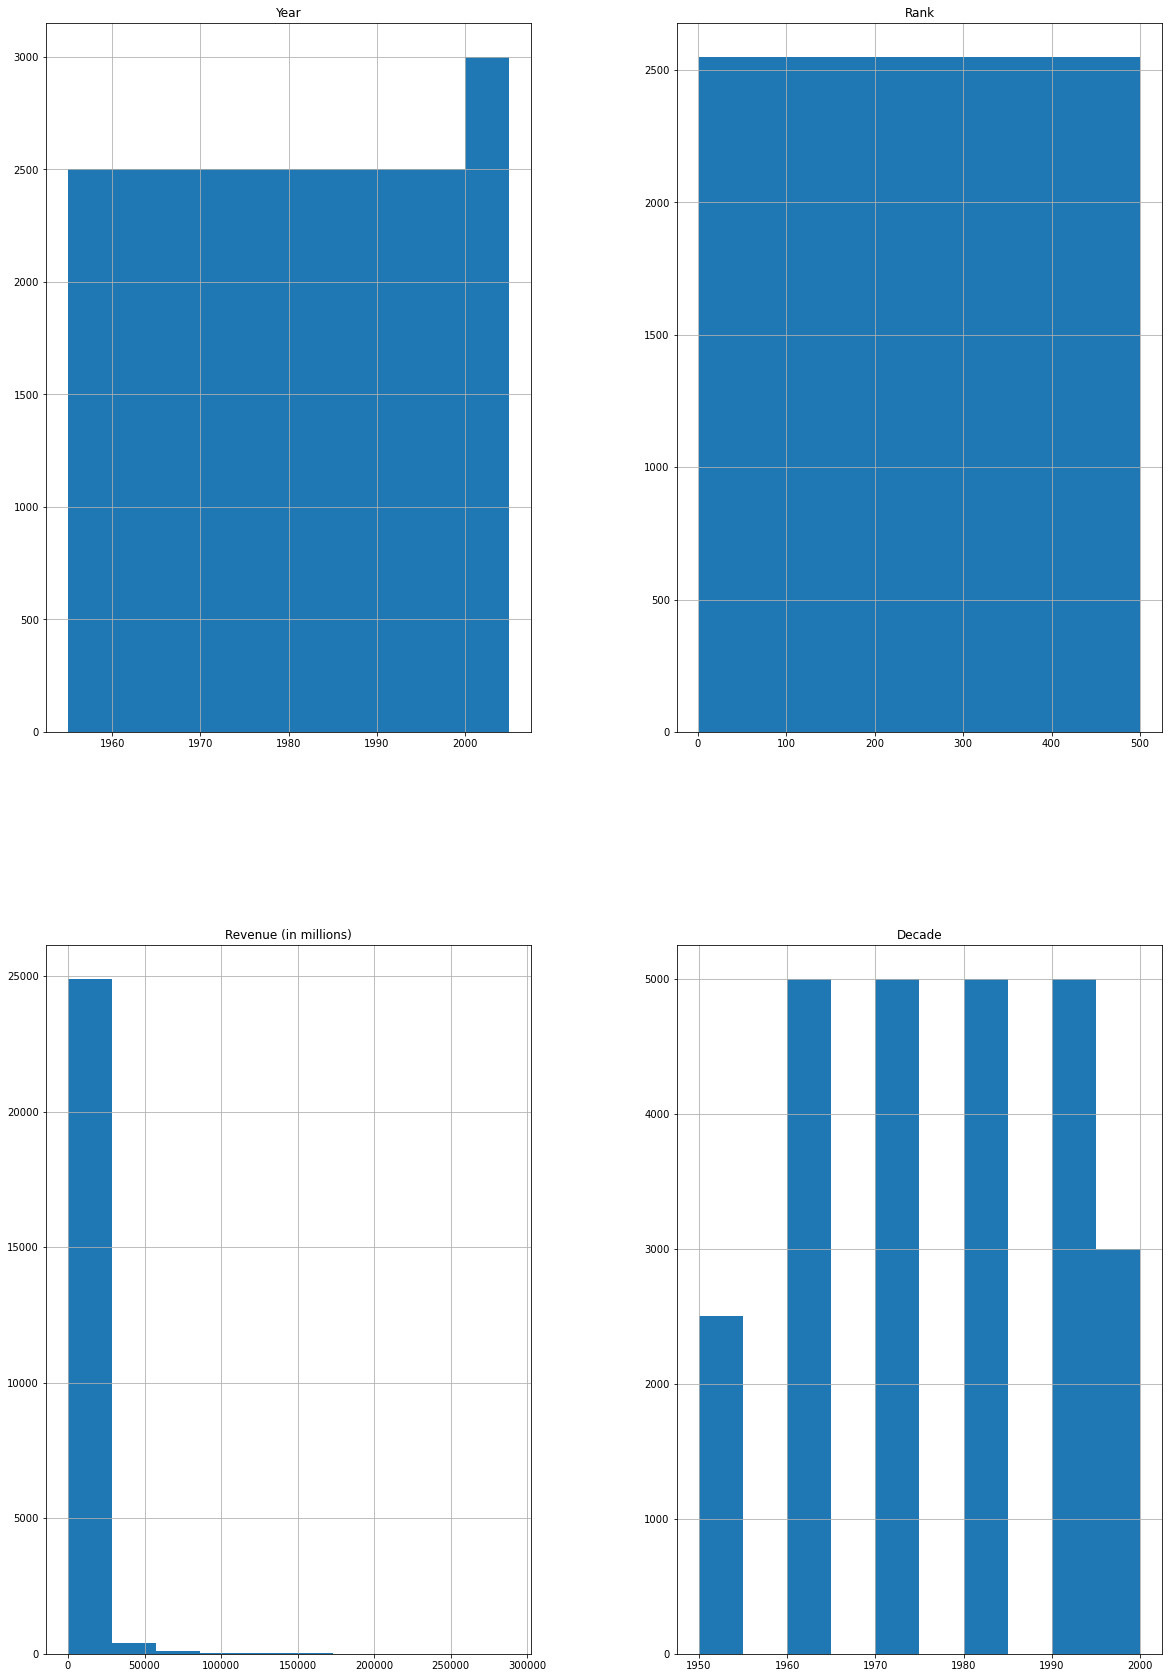

In [9]:
data.hist(figsize=(20,30))

In [7]:
# https://www.simplilearn.com/tutorials/data-analytics-tutorial/data-analytics-with-python 

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Decade
0,1955,1,General Motors,9823.5,806,1950
1,1955,2,Exxon Mobil,5661.4,584.8,1950
2,1955,3,U.S. Steel,3250.4,195.4,1950
3,1955,4,General Electric,2959.1,212.6,1950
4,1955,5,Esmark,2510.8,19.1,1950


       Year  Rank                Company  Revenue (in millions)  \
0      1955     1         General Motors                 9823.5   
1      1955     2            Exxon Mobil                 5661.4   
2      1955     3             U.S. Steel                 3250.4   
3      1955     4       General Electric                 2959.1   
4      1955     5                 Esmark                 2510.8   
...     ...   ...                    ...                    ...   
25495  2005   496        Wm. Wrigley Jr.                 3648.6   
25496  2005   497         Peabody Energy                 3631.6   
25497  2005   498  Wendy's International                 3630.4   
25498  2005   499     Kindred Healthcare                 3616.6   
25499  2005   500   Cincinnati Financial                 3614.0   

      Profit (in millions)  Decade  Revenue Development Growth  
0                      806    1950                         NaN  
1                    584.8    1950                         NaN  


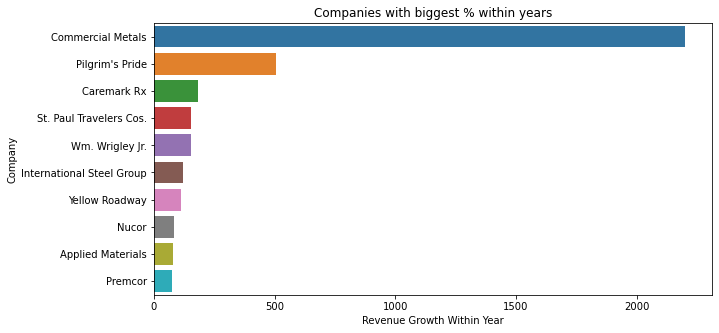

In [34]:
# Seaborn to find which companies grew more in revenue

# Find the % of the Revenue value growth compared to the last year 
data['Revenue Development Growth'] = data.groupby('Company')['Revenue (in millions)'].pct_change()*100

# Create a dataframe with the companies that had the biggest % of Revenue Growth
last_year = data['Year'].max()
growth_companies = data[data['Year'] == last_year].nlargest(10, 'Revenue Development Growth')
growth_companies = growth_companies.drop('Year',axis = 1)
growth_companies = growth_companies.drop('Rank',axis = 1)


# Transform it into %
data['Revenue Development Growth'] = (data['Revenue Development Growth'] * 100).round(2)
print(data) # not working yet

# Create the plot
plt.figure(figsize=(10,5))
sns.barplot(x='Revenue Development Growth',
           y= 'Company',
           data=growth_companies)
plt.xlabel('Revenue Growth Within Year')
plt.ylabel('Company')
plt.title('Companies with biggest % within years')
plt.show()


# Based on the outcome, we can conclude that Commercial Metals had the biggest percentage of revenue growth within the years on the data, which means that 


### Task 2

Create a plot that will show the 5 top Companies by Revenue for each decade. 



In [30]:
# Data already has "Decade" column created

# Def function to get the 5 highest Revenue and later on we will apply it by decades
def top5_decade(group):
    return group.nlargest(5, 'Revenue (in millions)')

top5_decade = data.groupby('Decade').apply(top5_decade)

print(top5_decade)

# Based on the new Dataframe we created, is possible to identify that General Motors, a car company, had total dominance over the market for 3 decades, being 1950, 1960 and 1990 and showed up significantly over the decade of 1980.
# This being observed, we can conclude that the Car sector has been in high demand for a long time and it is a consistant sector until nowadays.

              Year  Rank          Company  Revenue (in millions)  \
Decade                                                             
1950   500    1956     1   General Motors                12443.3   
       1500   1958     1   General Motors                10989.8   
       1000   1957     1   General Motors                10796.4   
       0      1955     1   General Motors                 9823.5   
       2000   1959     1   General Motors                 9522.0   
1960   7000   1969     1   General Motors                22755.4   
       5500   1966     1   General Motors                20734.0   
       6000   1967     1   General Motors                20208.5   
       6500   1968     1   General Motors                20026.3   
       5000   1965     1   General Motors                16997.0   
1970   12000  1979     1   General Motors                63221.1   
       12001  1979     2      Exxon Mobil                60334.5   
       11500  1978     1   General Motors       